# Local Agnostic Methods

In this notebook, we will look at local model-agnostic methods for interpreting
machine learning models.

## Naive Bayes: Adult

In [1]:
import pandas as pd
import sys
import os
import seaborn as sns
import matplotlib.pyplot as plt

module_path = os.path.abspath(os.path.join(".."))
if module_path not in sys.path:
    sys.path.append(module_path)

from forseti.bayesnet import interpretableNaiveBayes, latentLabelClassifier
from forseti.tree import interpretableTree

sns.set_style('darkgrid')

## Kind of Plot

In [2]:
kind = 'violin'

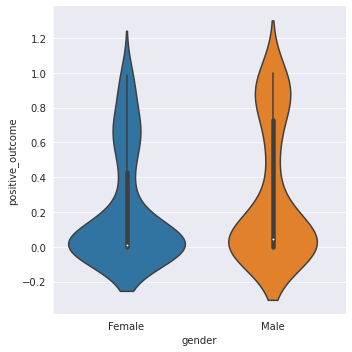

In [3]:
adultsens = pd.read_csv('data/adult.csv')
label = 'income'

model = interpretableNaiveBayes()
model.train(
    label,
    adultsens,
    'NBSens'
)

df = model.ICE('gender', samples=100)

sns.catplot(
    x='gender',
    y='positive_outcome',
    data=df,
    kind=kind
)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Amer-Indian-Eskimo'),
  Text(1, 0, 'Asian-Pac-Islander'),
  Text(2, 0, 'Black'),
  Text(3, 0, 'Other'),
  Text(4, 0, 'White')])

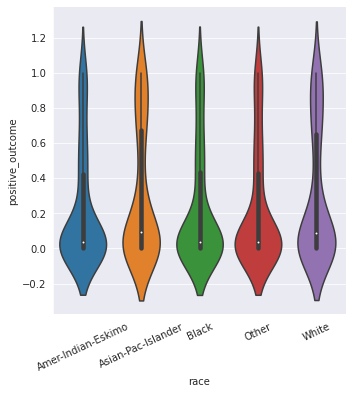

In [4]:
df = model.ICE('race', samples=100)
sns.catplot(
    x='race',
    y='positive_outcome',
    data=df,
    kind=kind
)
plt.xticks(rotation=25)

(array([0, 1]), [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

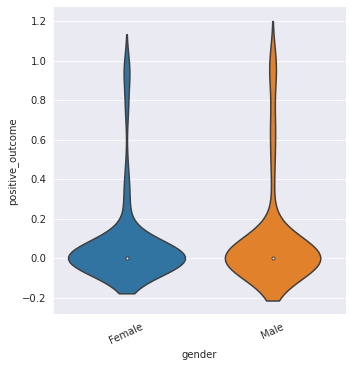

In [5]:
sensitives = ['gender', 'race']
adult = adultsens
adult[sensitives] = adult[sensitives].sample(frac=1)

model = interpretableNaiveBayes()
model.train(
    label,
    adult,
    'NB'
)

df = model.ICE('gender', samples=100)
sns.catplot(
    x='gender',
    y='positive_outcome',
    data=df,
    kind=kind
)
plt.xticks(rotation=25)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Amer-Indian-Eskimo'),
  Text(1, 0, 'Asian-Pac-Islander'),
  Text(2, 0, 'Black'),
  Text(3, 0, 'Other'),
  Text(4, 0, 'White')])

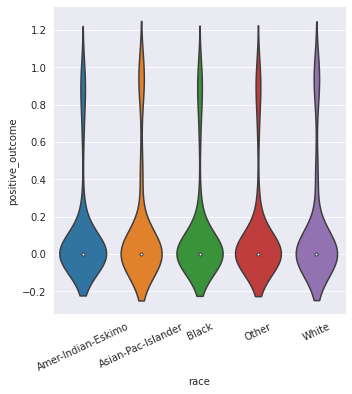

In [6]:
df = model.ICE('race', samples=100)
sns.catplot(
    x='race',
    y='positive_outcome',
    data=df,
    kind=kind
)
plt.xticks(rotation=25)

## Naive Bayes: Compas

/home/bcwein/anaconda3/envs/forseti/lib/python3.7/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:537: UserWarning: Found unknown state name. Trying to switch to using all state names as state numbers
  UserWarning,
/home/bcwein/anaconda3/envs/forseti/lib/python3.7/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'African-American'),
  Text(1, 0, 'Asian'),
  Text(2, 0, 'Caucasian'),
  Text(3, 0, 'Hispanic'),
  Text(4, 0, 'Native American'),
  Text(5, 0, 'Other')])

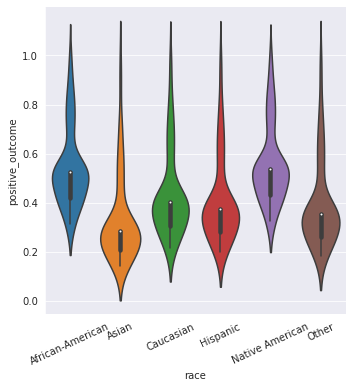

In [7]:
compassens = pd.read_csv('data/compas-two-yrs-recidivism.csv')

features = [
    'race',
    'sex',
    'priors_count',
    'juv_fel_count',
    'juv_misd_count',
    'juv_other_count',
    'c_charge_degree',
    'two_year_recid'
]

compassens = compassens[features]
label = 'two_year_recid'

model = interpretableNaiveBayes()

model.train(
    label,
    compassens,
    'NBSens'
)

df = model.ICE('race', samples=100)
sns.catplot(
    x='race',
    y='positive_outcome',
    data=df,
    kind=kind
)
plt.xticks(rotation=25)

(array([0, 1]), [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

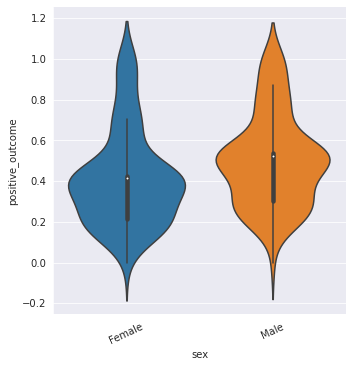

In [8]:
df = model.ICE('sex', samples=100)
sns.catplot(
    x='sex',
    y='positive_outcome',
    data=df,
    kind=kind
)
plt.xticks(rotation=25)

/home/bcwein/anaconda3/envs/forseti/lib/python3.7/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:537: UserWarning: Found unknown state name. Trying to switch to using all state names as state numbers
  UserWarning,


(array([0, 1]), [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

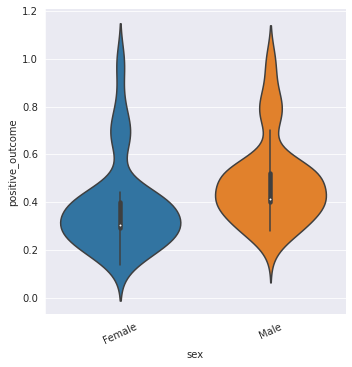

In [9]:
sensitives = ['sex', 'race']
compas = compassens
compas[sensitives] = compas[sensitives].sample(frac=1)

model = interpretableNaiveBayes()

model.train(
    label,
    compas,
    'NBSens'
)

df = model.ICE('sex', samples=100)
sns.catplot(
    x='sex',
    y='positive_outcome',
    data=df,
    kind=kind
)
plt.xticks(rotation=25)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'African-American'),
  Text(1, 0, 'Asian'),
  Text(2, 0, 'Caucasian'),
  Text(3, 0, 'Hispanic'),
  Text(4, 0, 'Native American'),
  Text(5, 0, 'Other')])

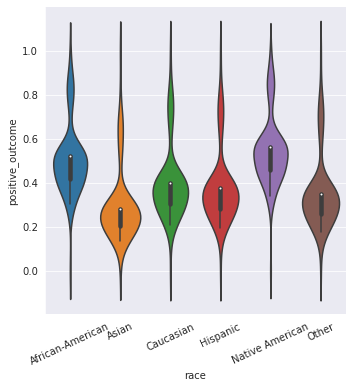

In [10]:
df = model.ICE('race', samples=100)
sns.catplot(
    x='race',
    y='positive_outcome',
    data=df,
    kind=kind
)
plt.xticks(rotation=25)

## Fair Bayesian Network: Adult

In [11]:
sensitives = ['gender', 'race']
label = 'income'

clf = latentLabelClassifier(
    adultsens,
    sensitives,
    label
)

clf.load('trained-models/fair_model.sav')

/home/bcwein/anaconda3/envs/forseti/lib/python3.7/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


(array([0, 1]), [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

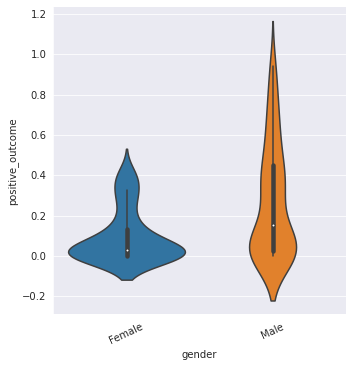

In [12]:
df = clf.ICE('gender', samples=100)
sns.catplot(
    x='gender',
    y='positive_outcome',
    data=df,
    kind=kind
)
plt.xticks(rotation=25)

In [13]:
df = clf.ICE('race', samples=100)

<Figure size 1280x720 with 0 Axes>

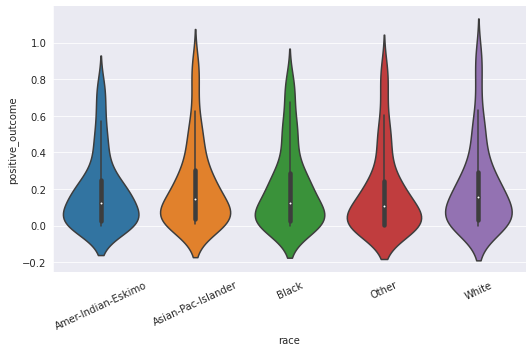

In [18]:
plt.figure(figsize=(10*(16/9), 10))
sns.catplot(
    x='race',
    y='positive_outcome',
    data=df,
    kind=kind,
    aspect=1.5
)
plt.xticks(rotation=25)
plt.tight_layout()
plt.savefig('test.png', dpi=600)

## Fair Bayesian Network: Compas

In [15]:
sensitives = ['sex', 'race']
label = 'two_year_recid'

clf = latentLabelClassifier(
    compassens,
    sensitives,
    label
)

clf.fit()

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

In [16]:
df = clf.ICE('sex', samples=100)
sns.catplot(
    x='sex',
    y='positive_outcome',
    data=df,
    kind=kind
)
plt.xticks(rotation=25)

KeyboardInterrupt: 

/home/bcwein/anaconda3/envs/forseti/lib/python3.7/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:472: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi.values.sum()


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'African-American'),
  Text(1, 0, 'Asian'),
  Text(2, 0, 'Caucasian'),
  Text(3, 0, 'Hispanic'),
  Text(4, 0, 'Native American'),
  Text(5, 0, 'Other')])

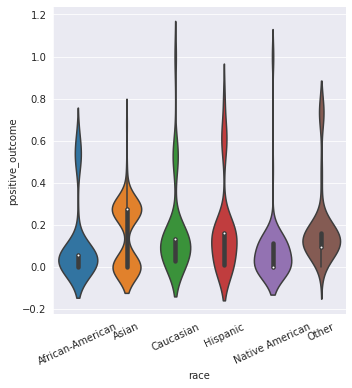

In [ ]:
df = clf.ICE('race', samples=100)
sns.catplot(
    x='race',
    y='positive_outcome',
    data=df,
    kind=kind
)
plt.xticks(rotation=25)

## Fair Random Forest Classifier: Adult Dataset

In [ ]:
clf = interpretableTree()

sensitives = ['gender', 'race']

clf.train(
    adultsens,
    sensitives,
    label,
    orth=0.5
)

KeyError: 'two_year_recid'

In [ ]:
samples=20
attr='hours-per-week'

a = clf.X_test.sample(samples)

df = pd.DataFrame()

codes = list(sorted(a[attr].unique()))

for i, val in enumerate(sorted(a[attr].unique())):
    a[attr] = val
    arr = clf.predict_proba(a)
    arr[:, 0] = i

    df = df.append(
        pd.DataFrame(
            arr,
            columns=['X', 'Positive Predictive Probability']
        )
    )

for idx in df.index.unique():
    plt.plot(
        df.loc[idx]['X'],
        df.loc[idx].iloc[:, 1],
        c='#1f77b4',
        alpha=0.5
    )

    plt.xlabel(attr)
    plt.ylabel('Positive Outcome Probability')
    plt.xticks(range(len(codes)), codes, size='small')
    plt.xticks(rotation=45)